In [17]:
# Problem 3.25
# Examine the derivative of a noisy function: f(x) = 2 + 5 sin (x) + 0.1 sin (30x)
# Take 128 points placed on an equally spaced grid from 0 to 2π and produce a table of values, (x_i,f(x_i))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define functions
def f_func(x):
    return 2 + 5*np.sin(x) + 0.1*np.sin(30*x)

def g_func(x):
    return 2 + 5*np.sin(x)

# Forward-difference approximation
def forward_diff(f_func, x, h):
    fd = (f_func(x+h) - f_func(x))/(h)
    return fd

# Grid setup
N = 128
x = np.linspace(0, 2*np.pi, N, endpoint=False)
h = x[1] - x[0]

#Table (x_i, f(x_i))
fx = f_func(x)
table = np.column_stack((x, fx))
df = pd.DataFrame(table, columns=["x_i", "f(x_i)"])
df.head(N)



,x_i,f(x_i)
0,0.000000,2.000000
1,0.049087,2.344857
2,0.098175,2.509595
3,0.147262,2.637958
4,0.196350,2.937183
...,...,...
123,6.037748,0.696907
124,6.086836,1.062817
125,6.135923,1.362042
126,6.185011,1.490405


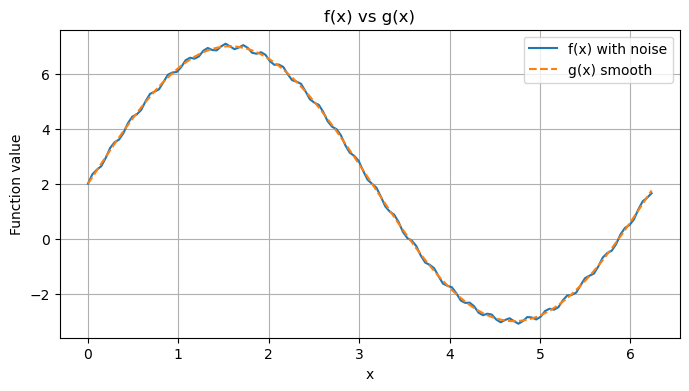

In [18]:
# (a) Plot f(x) together with g(x), where g(x) does not contain the third (highly oscillatory) term.
# Observe that the two curves basically lie on top of each other.

# Function values
fx = f_func(x)
gx = g_func(x)

#Plotting
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, fx, label="f(x) with noise")
ax.plot(x, gx, "--", label="g(x) smooth")
ax.set_title("f(x) vs g(x)")
ax.set_xlabel("x")
ax.set_ylabel("Function value")
ax.grid(True)
ax.legend()
plt.savefig("Problem3-25a.png")
plt.show()


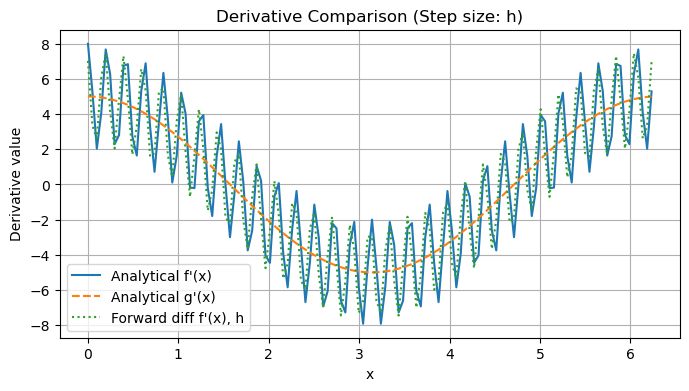

In [27]:
# (b) Create a plot that contains: (i) the analytically computed f'(x), 
# (ii) the analytically computed g'(x), and 
# (iii) the forward difference approximation to f'(x), using adjacent points on your grid.
# Observe that both the analytical f'(x) and the forward-difference approximation to it are highly oscillatory and therefore quite different from the "underlying" behavior of g'(x).

# Analytical derivatives
def f_prime(x):
    return 5*np.cos(x) + 3*np.cos(30*x)

def g_prime(x):
    return 5*np.cos(x)
    
# Numerical derivative
forward_diff_h = (np.roll(fx, -1) - fx) / h              # step h

# Plotting
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f_prime(x), label="Analytical f'(x)")
ax.plot(x, g_prime(x), "--", label="Analytical g'(x)")
ax.plot(x, forward_diff_h, ":", label="Forward diff f'(x), h")
ax.set_title("Derivative Comparison (Step size: h)")
ax.set_xlabel("x")
ax.set_ylabel("Derivative value")
ax.grid(True)
ax.legend()
#plt.savefig("Problem3-25b.png")
plt.show()

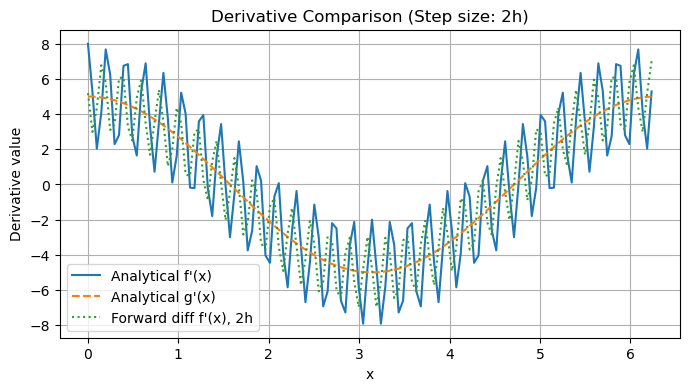

In [26]:
# (c) Introduce a new set of points into your latest plot:
# (iv) the forward-difference approximation of f'(x), using grid points which are twice removed.
# Observe that this set of points exhibits "noise" with smaller amplitude; this is because we have employed a larger step size h
# and have thereby smoothed out some of the "unphysical" oscillations due to the third term.

# Numerical derivative
forward_diff_2h = (np.roll(fx, -2) - fx) / (2*h)         # step 2h

# Plotting
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f_prime(x), label="Analytical f'(x)")
ax.plot(x, g_prime(x), "--", label="Analytical g'(x)")
ax.plot(x, forward_diff_2h, ":", label="Forward diff f'(x), 2h")
ax.set_title("Derivative Comparison (Step size: 2h)")
ax.set_xlabel("x")
ax.set_ylabel("Derivative value")
ax.grid(True)
ax.legend()
#plt.savefig("Problem3-25c.png")
plt.show()

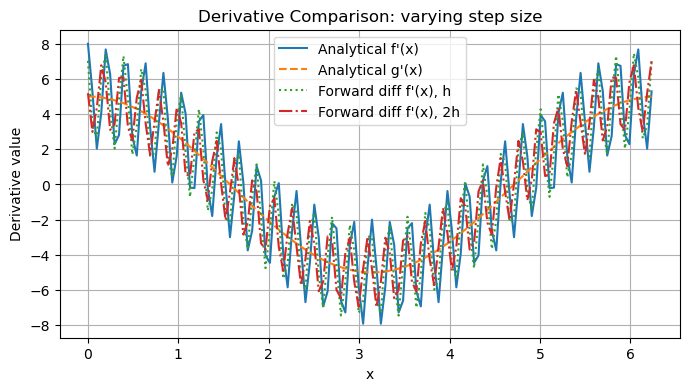

In [28]:
# Combined plot: Derivatives with step h and step 2h

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, f_prime(x), label="Analytical f'(x)")
ax.plot(x, g_prime(x), "--", label="Analytical g'(x)")
ax.plot(x, forward_diff_h, ":", label="Forward diff f'(x), h")
ax.plot(x, forward_diff_2h, "-.", label="Forward diff f'(x), 2h")
ax.set_title("Derivative Comparison: varying step size")
ax.set_xlabel("x")
ax.set_ylabel("Derivative value")
ax.grid(True)
ax.legend()
#plt.savefig("Problem3-25_combined.png")
plt.show()